In [126]:
import pandas as pd
df = pd.read_csv('student.csv')

df = df.iloc[:-1]
df = df.iloc[:, 2:]
df

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,18,Female,State,75%,Yes,No,Bus,2,Sometimes,No,No,Yes,Yes,Fail
140,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA


In [29]:
target='Transportation'

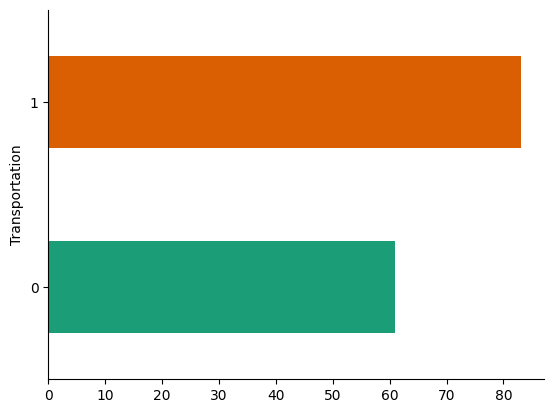

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

df.groupby(target).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

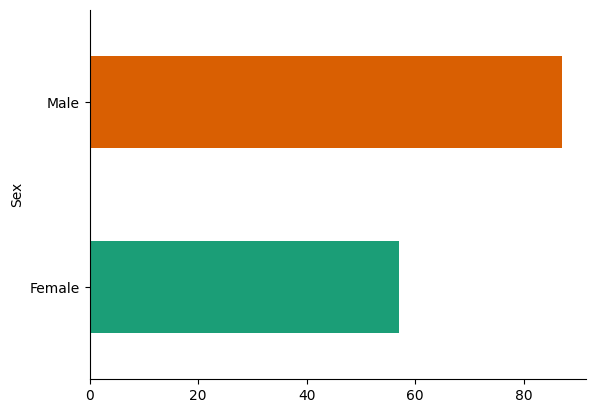

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

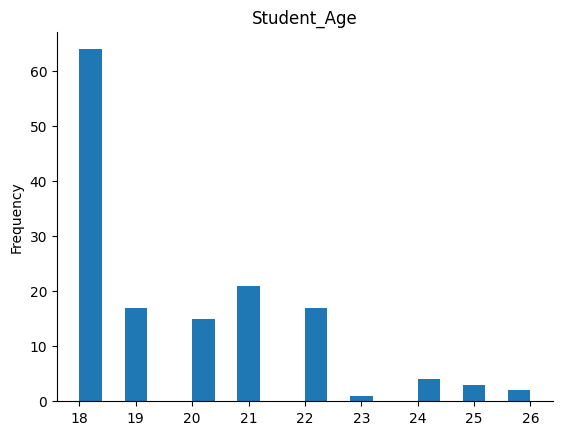

In [5]:
from matplotlib import pyplot as plt
df['Student_Age'].plot(kind='hist', bins=20, title='Student_Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [127]:

df.describe()
df.info()

df.duplicated().sum()

df.drop_duplicates(inplace=True)

df.fillna(df.mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_Age         144 non-null    int64 
 1   Sex                 144 non-null    object
 2   High_School_Type    144 non-null    object
 3   Scholarship         144 non-null    object
 4   Additional_Work     144 non-null    object
 5   Sports_activity     144 non-null    object
 6   Transportation      144 non-null    object
 7   Weekly_Study_Hours  144 non-null    int64 
 8   Attendance          144 non-null    object
 9   Reading             144 non-null    object
 10  Notes               144 non-null    object
 11  Listening_in_Class  144 non-null    object
 12  Project_work        144 non-null    object
 13  Grade               144 non-null    object
dtypes: int64(2), object(12)
memory usage: 15.9+ KB


<ipython-input-127-e1785959d245>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [66]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include='object'):
  df[column] = le.fit_transform(df[column])

  print(f"{column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Sex: {'Female': 0, 'Male': 1}
High_School_Type: {'Other': 0, 'Private': 1, 'State': 2}
Scholarship: {'0%': 0, '100%': 1, '25%': 2, '50%': 3, '75%': 4}
Additional_Work: {'No': 0, 'Yes': 1}
Sports_activity: {'No': 0, 'Yes': 1}
Transportation: {'Bus': 0, 'Private': 1}
Attendance: {'Always': 0, 'Never': 1, 'Sometimes': 2}
Reading: {'No': 0, 'Yes': 1}
Notes: {'No': 0, 'Yes': 1}
Listening_in_Class: {'No': 0, 'Yes': 1}
Project_work: {'No': 0, 'Yes': 1}
Grade: {'AA': 0, 'BA': 1, 'BB': 2, 'CB': 3, 'CC': 4, 'DC': 5, 'DD': 6, 'Fail': 7}


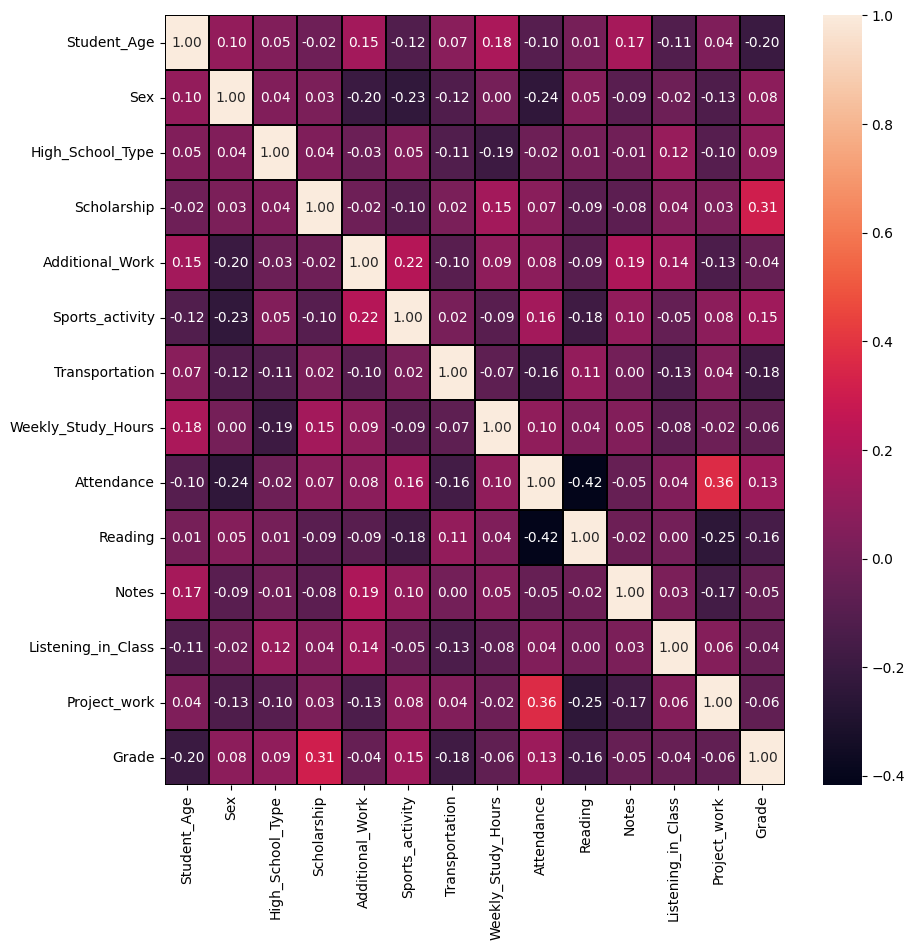

In [67]:

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, linewidths=0.2, linecolor="black", fmt=".2f", ax=ax)

plt.show()


In [68]:
df

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,1,0,3,1,0,1,0,0,1,1,0,0,0
1,20,1,0,3,1,0,1,0,0,1,0,1,1,0
2,21,1,2,3,0,0,1,2,1,0,0,0,1,0
3,18,0,1,3,1,0,0,2,0,0,1,0,0,0
4,22,1,1,3,0,0,0,12,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,18,0,2,4,1,0,0,2,2,0,0,1,1,7
140,22,0,2,3,1,1,1,0,0,0,1,0,1,4
141,18,0,2,4,0,0,1,0,1,0,1,1,0,4
142,18,0,1,4,0,0,1,0,0,1,0,0,0,0


In [69]:

from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [131]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_leaf_nodes=4, max_depth=5, max_features=3).fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Model score:', score)

y_pred = model.predict(X_test)

Model score: 0.45454545454545453


**Accuracy** of the model after EDA is **45.5%**

In [132]:


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

print("Accuracy:", accuracy)

print("Classification Report:")
print(report)



Confusion Matrix:
[[ 2 15]
 [ 9 18]]
Accuracy: 0.45454545454545453
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.12      0.14        17
           1       0.55      0.67      0.60        27

    accuracy                           0.45        44
   macro avg       0.36      0.39      0.37        44
weighted avg       0.40      0.45      0.42        44



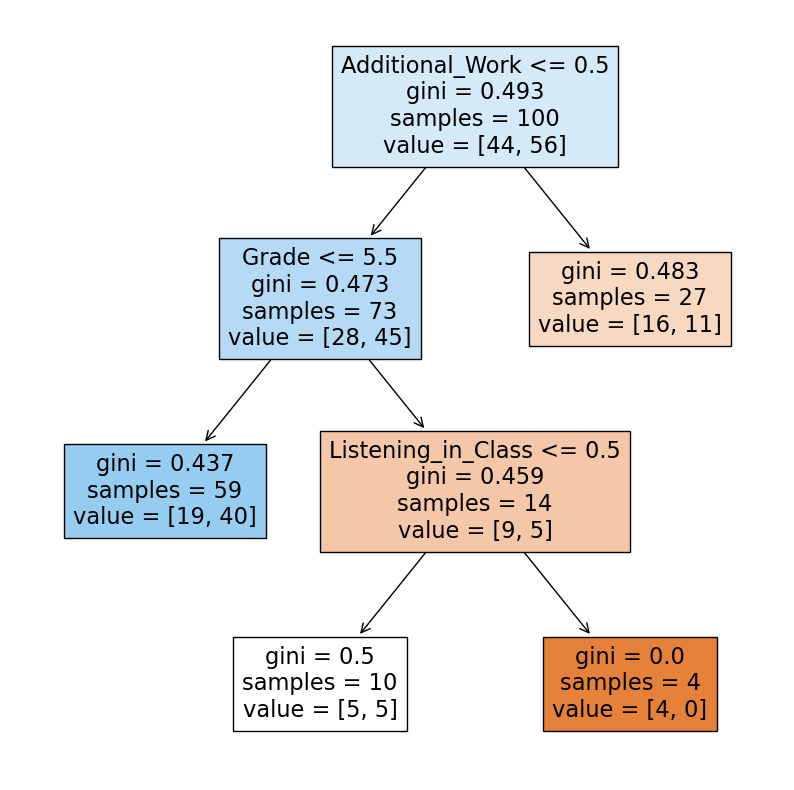

In [71]:

import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


In [81]:

from sklearn.model_selection import GridSearchCV
grid_params = {
    'max_leaf_nodes': [4, 5, 6, 7, 8, 9, 10,15,20],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,20],
    'max_features': [2, 3, 4, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=grid_params, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)


{'max_depth': 7, 'max_features': 4, 'max_leaf_nodes': 10}


In [82]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7,max_features=4,max_leaf_nodes=10).fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Model score:', score)

y_pred = model.predict(X_test)

Model score: 0.5454545454545454


**Accuracy** of the model after Grid Search is **54.5%**
This is done by iterating through various parameters to find best parameters

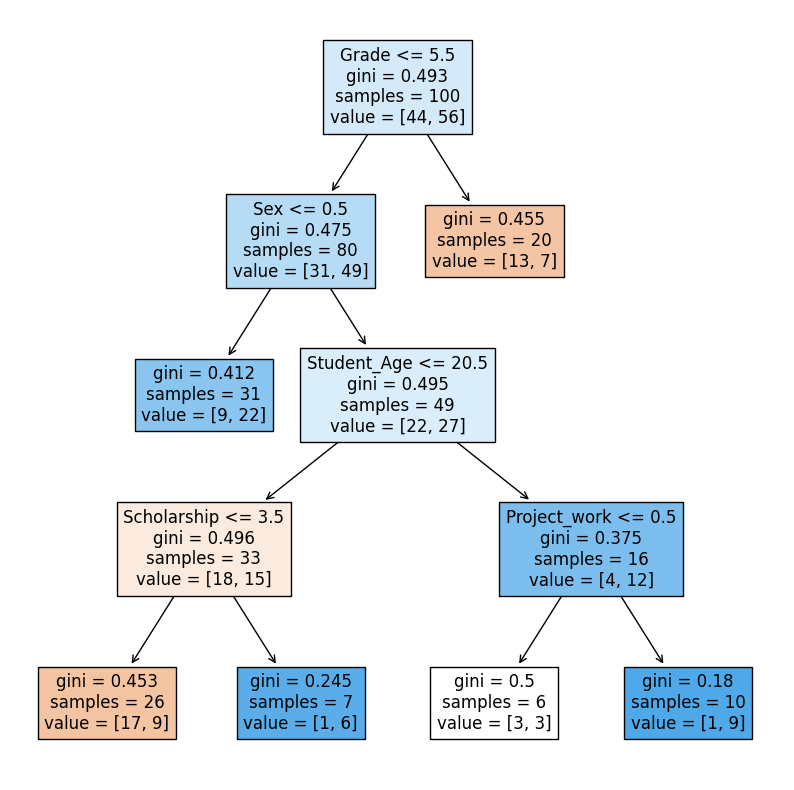

In [74]:


import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


In [83]:


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

print("Accuracy:", accuracy)

print("Classification Report:")
print(report)



Confusion Matrix:
[[ 4 13]
 [ 7 20]]
Accuracy: 0.5454545454545454
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.24      0.29        17
           1       0.61      0.74      0.67        27

    accuracy                           0.55        44
   macro avg       0.48      0.49      0.48        44
weighted avg       0.51      0.55      0.52        44



In [118]:

correlations = df.corr()[target].sort_values(ascending=False)

df.drop(columns=correlations.index[-3:], inplace=True)


In [134]:

from imblearn.over_sampling import RandomOverSampler, SMOTE

oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)
y_over
model = DecisionTreeClassifier(max_leaf_nodes=16, max_depth=20, max_features=5)
model.fit(X_over, y_over)
score = model.score(X_test, y_test)
print('Model score:', score)
y_pred = model.predict(X_test)

Model score: 0.7272727272727273


Accuracy increases from 54% to **72%** due to appropiate oversampling by **SMOTE**

The SMOTE applied oversamples the minority class in the training data , while the test data remains same, thus avoiding overfitting, and increasing accuracy

In [135]:
print(y_over.value_counts())


1    83
0    83
Name: Transportation, dtype: int64


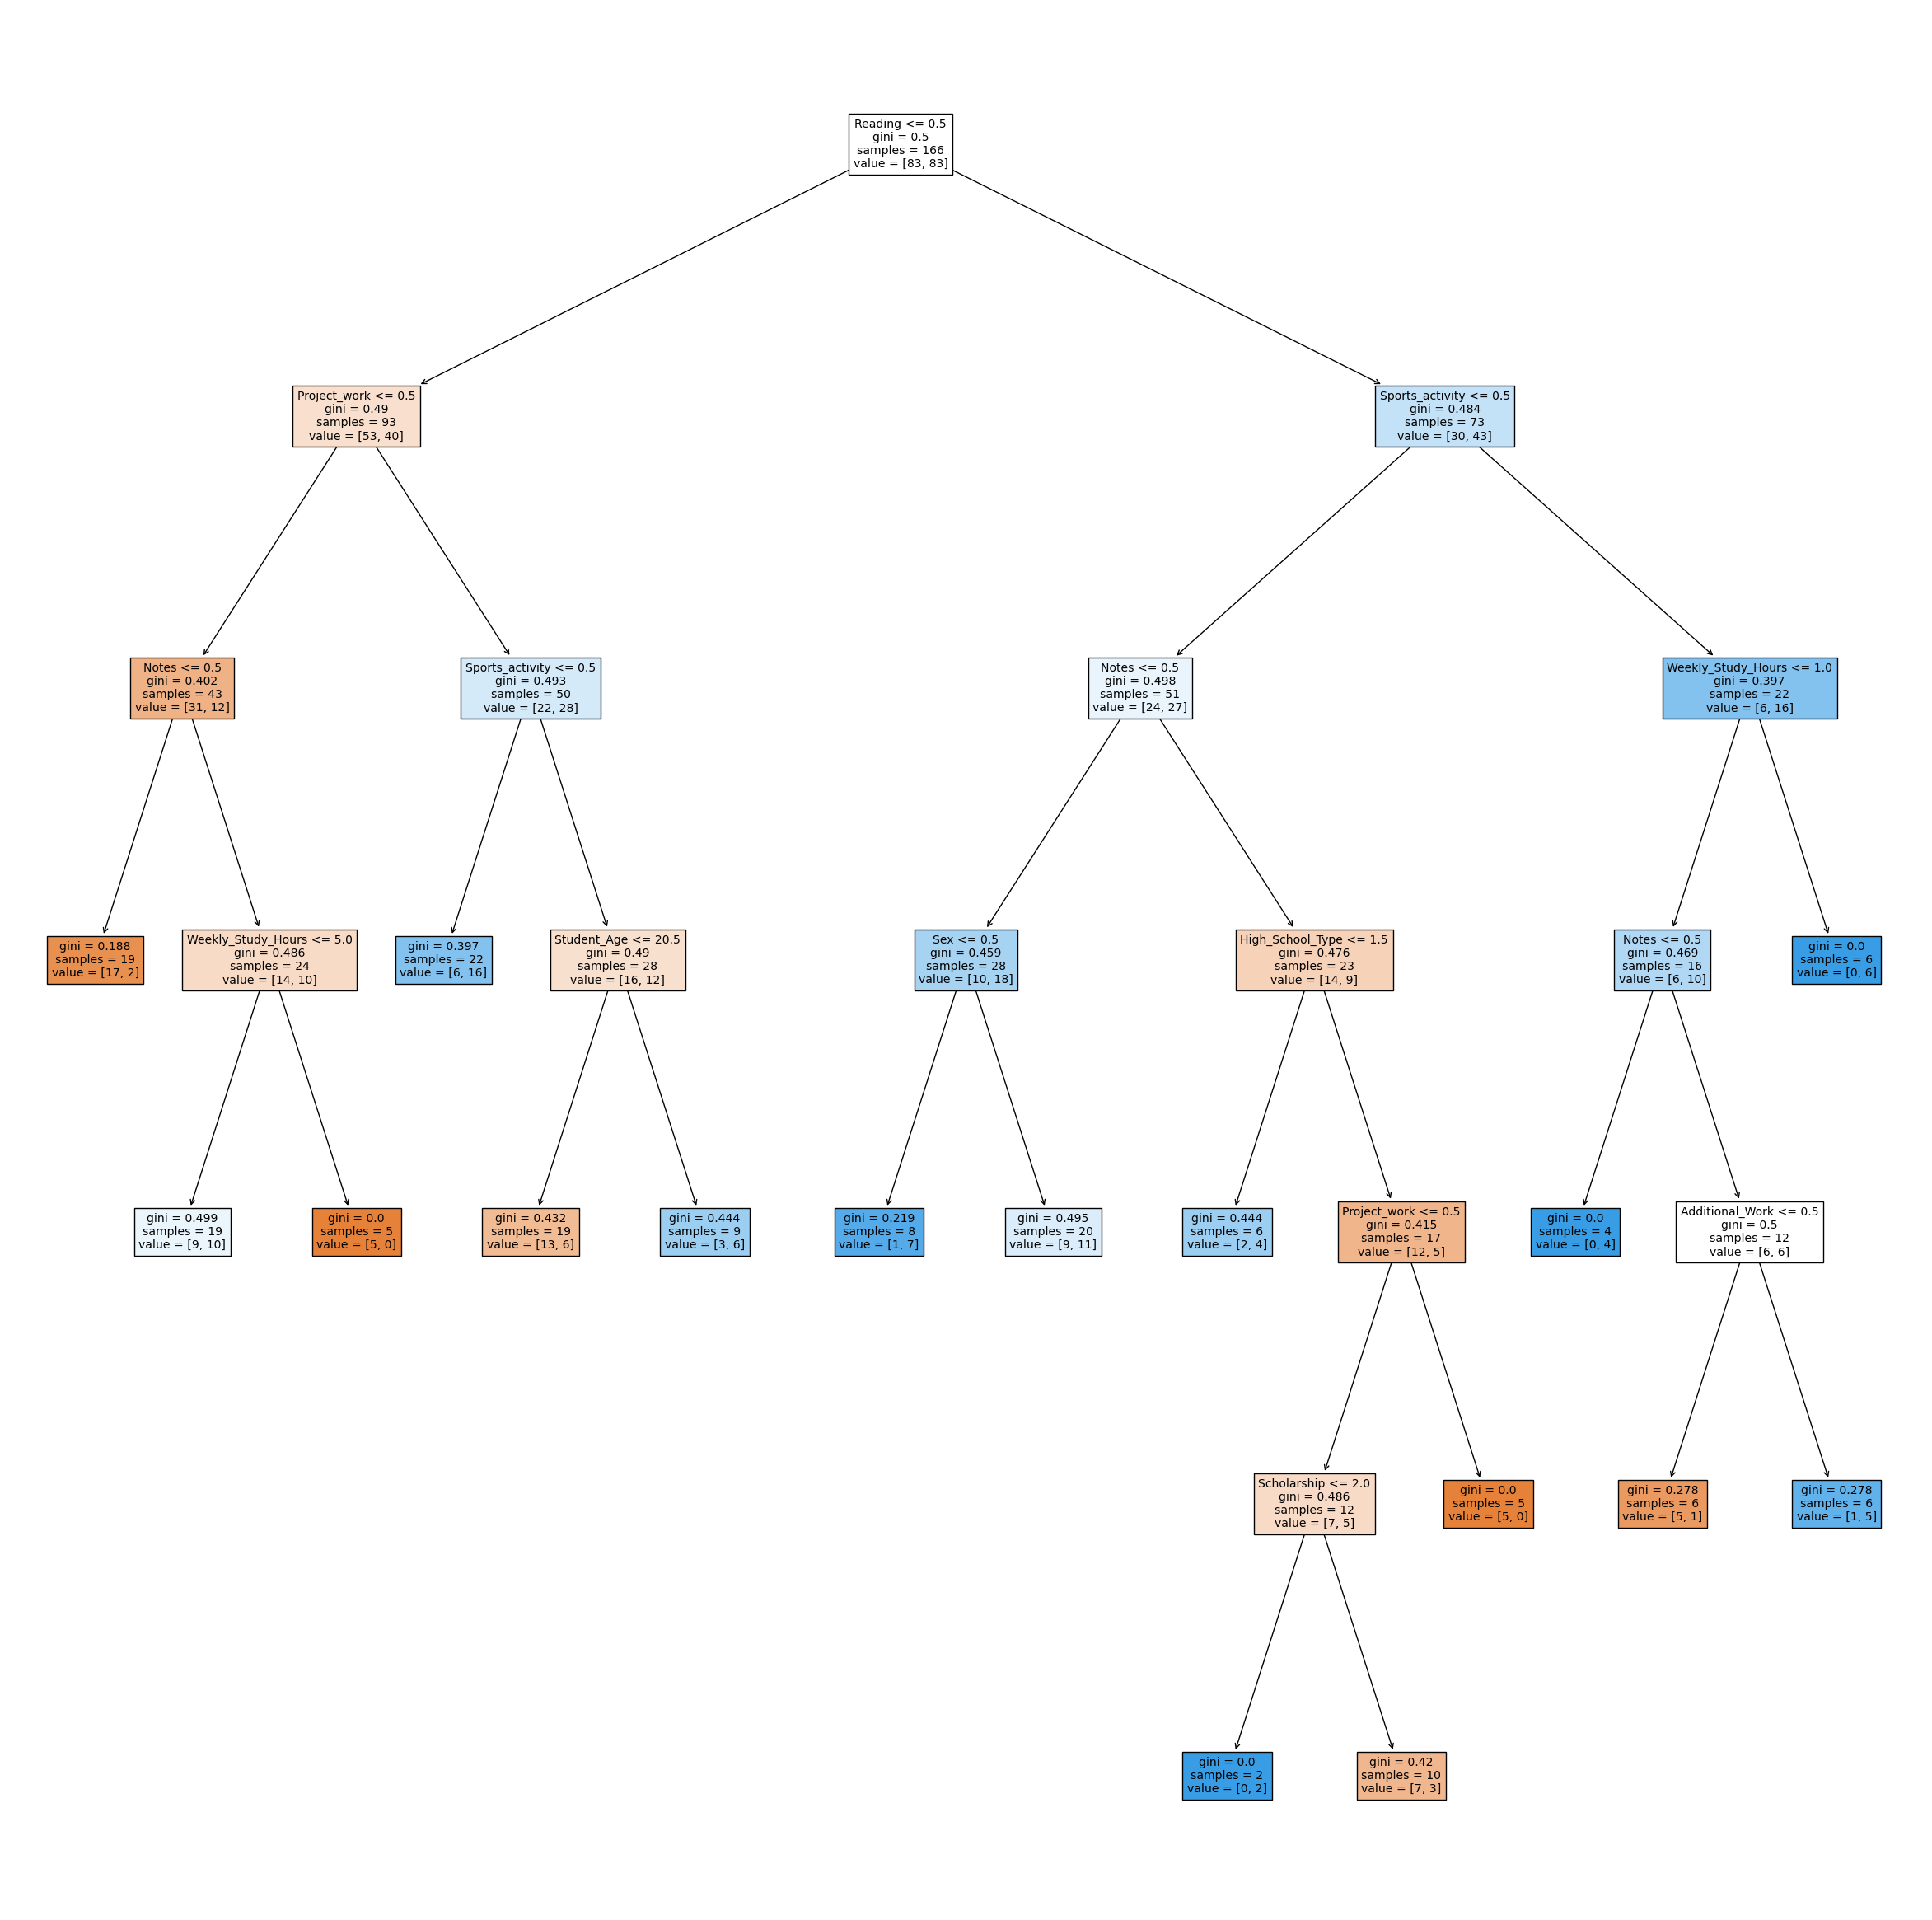

In [136]:

fig = plt.figure(figsize=(30, 30))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

print("Accuracy:", accuracy)

print("Classification Report:")
print(report)



Confusion Matrix:
[[ 8  9]
 [ 3 24]]
Accuracy: 0.7272727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.73      0.89      0.80        27

    accuracy                           0.73        44
   macro avg       0.73      0.68      0.69        44
weighted avg       0.73      0.73      0.71        44

